<a href="https://colab.research.google.com/github/cbekk/cbekk.github.io/blob/main/MO_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports and Datasets**

In [2]:
#Installs


#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#Build dataframes
df1 = pd.read_excel('/content/TRAIN_QUANTITATIVE_METADATA.xlsx')
df2 = pd.read_excel('/content/TRAINING_SOLUTIONS.xlsx')
df3 = pd.read_excel('/content/TRAIN_CATEGORICAL_METADATA.xlsx')

# Merge datasets on a common column, e.g., 'participant_id'
df = pd.merge(df1, df2, on='participant_id', how='inner')


**Dataset Cleaning and Exploring**

In [3]:
df.shape

(1213, 21)

In [4]:
df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,1,5,0,5,1,0,10,NaN,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,6,8,7,8,10,4,5,NaN,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,2,8,5,7,6,4,9,8.239904,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,4,16,9,10,8,4,6,NaN,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,4,11,4,10,7,3,9,8.940679,1,1


In [5]:
label1_name = 'ADHD_Outcome'
label1 = df['ADHD_Outcome']
label2_name = 'Sex_F'
label2 = df['Sex_F']
features = df.drop('participant_id', axis=1)
features

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN,1,1
1,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN,1,0
2,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904,1,0
3,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN,1,1
4,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,87.80,14,5,14,39,20,15,21,1,9,2,7,3,6,2,0,9,10.697923,0,0
1209,77.80,14,3,10,32,20,11,23,6,18,3,11,9,5,7,4,7,13.964750,0,1
1210,16.68,14,3,16,28,15,19,27,3,4,1,3,0,0,1,0,10,NaN,0,1
1211,53.40,14,3,14,34,18,23,23,4,9,0,9,3,5,0,0,9,12.089094,0,0


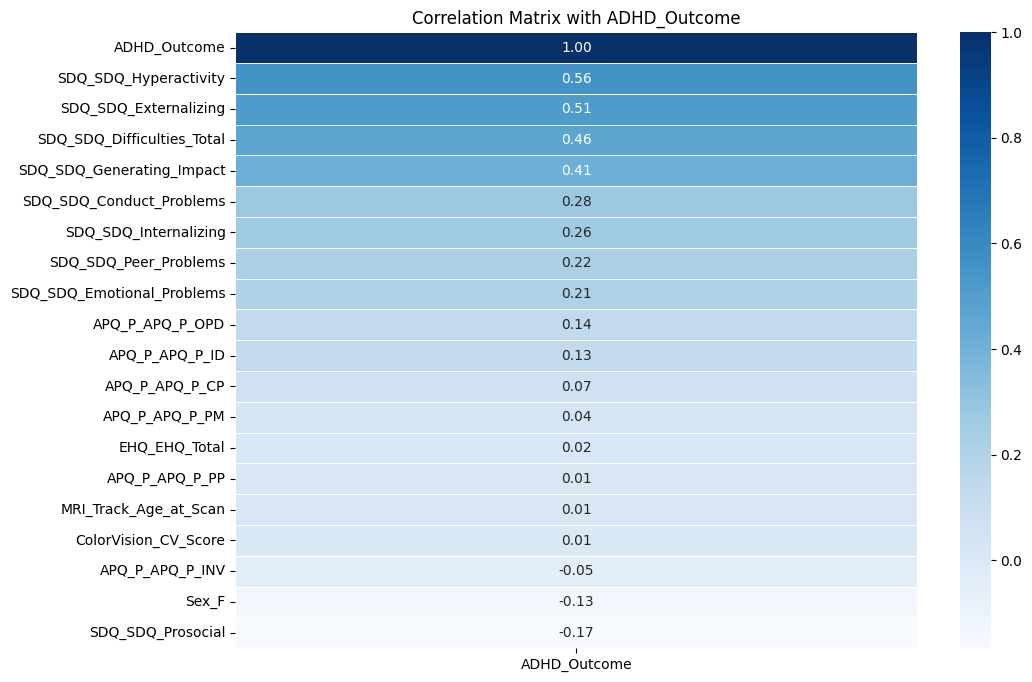

In [6]:
# Select all numeric features
numeric_df_with_label = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df_with_label.corr()

# Plot the heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(correlation_matrix[['ADHD_Outcome']].sort_values(by=['ADHD_Outcome'],ascending=False), annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix with ADHD_Outcome")
plt.show()

In [7]:
features = df.drop(['participant_id','SDQ_SDQ_Prosocial','APQ_P_APQ_P_INV','ColorVision_CV_Score','MRI_Track_Age_at_Scan','APQ_P_APQ_P_PP','EHQ_EHQ_Total','APQ_P_APQ_P_PM','APQ_P_APQ_P_CP'], axis=1)

In [8]:
nan_count = df.isnull().sum()
nan_count

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


In [9]:
nan_col_type = df[nan_count[nan_count != 0].index].dtypes #Get nan column datatype
nan_col_type

,0
MRI_Track_Age_at_Scan,float64


In [10]:
df['MRI_Track_Age_at_Scan_na'] = df['MRI_Track_Age_at_Scan'].isnull()
df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F,MRI_Track_Age_at_Scan_na
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,5,0,5,1,0,10,NaN,1,1,True
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,8,7,8,10,4,5,NaN,1,0,True
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,8,5,7,6,4,9,8.239904,1,0,False
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,16,9,10,8,4,6,NaN,1,1,True
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,11,4,10,7,3,9,8.940679,1,1,False


**Handling Missing Values**

In [11]:
nan_count = df.isnull().sum()
nan_count

,0
participant_id,0
EHQ_EHQ_Total,0
ColorVision_CV_Score,0
APQ_P_APQ_P_CP,0
APQ_P_APQ_P_ID,0
APQ_P_APQ_P_INV,0
APQ_P_APQ_P_OPD,0
APQ_P_APQ_P_PM,0
APQ_P_APQ_P_PP,0
SDQ_SDQ_Conduct_Problems,0


In [12]:
df.loc[df['MRI_Track_Age_at_Scan'].isnull()]

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F,MRI_Track_Age_at_Scan_na
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,5,0,5,1,0,10,NaN,1,1,True
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,8,7,8,10,4,5,NaN,1,0,True
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,16,9,10,8,4,6,NaN,1,1,True
5,tBGXkEdv2cp7,83.34,2,5,12,35,16,15,21,4,...,12,9,8,5,5,3,NaN,1,0,True
11,6fpygdQTScAW,66.74,13,5,15,40,15,20,25,2,...,4,0,2,0,0,10,NaN,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,AWjsfXr7mM1a,-7.74,14,4,10,43,23,15,28,2,...,6,3,4,9,5,10,NaN,0,1,True
1198,oCjIknDVeyxP,-12.27,14,3,12,48,18,18,29,0,...,0,0,0,1,0,10,NaN,0,1,True
1199,tA3Zd6tgcNwx,-6.67,14,3,13,41,17,16,28,1,...,3,1,2,2,0,9,NaN,0,1,True
1207,Zusa1n9tQ3Yb,100.00,14,5,20,45,21,20,29,1,...,6,1,5,3,1,9,NaN,0,1,True


In [13]:
# look at one row that contains a missing value for age
print("Row 1190:  " + str(df['MRI_Track_Age_at_Scan'][1190]))

# compute mean for all non null age values
mean=df['MRI_Track_Age_at_Scan'].mean()
print("mean value for all age columns: " + str(mean))

# fill all missing values with the mean
df['MRI_Track_Age_at_Scan'].fillna(value=mean, inplace=True)

# look at one of the rows that contained a missing value for age.
# It should now contain the mean
print("Row 1190:  " + str(df['MRI_Track_Age_at_Scan'][1190]))
print();


Row 1190:  nan
mean value for all age columns: 11.245678424384526
Row 1190:  11.245678424384526



<ipython-input-13-3158b6d1d355>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MRI_Track_Age_at_Scan'].fillna(value=mean, inplace=True)


In [14]:
np.sum(df['MRI_Track_Age_at_Scan'].isnull(), axis = 0) #Check if missing values are handled

0

**Model Training and Testing**

In [15]:
X = df[features.columns]
y = df[[label1_name, label2_name]]

# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'string']).columns

# Perform one-hot encoding on the features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create and train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [16]:
# Make predictions and evaluate with mse
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0


**Debugging Perfect MSE**

In [17]:
overlap = X_train.merge(X_test, how='inner')
print(f"Number of overlapping rows between X_train and X_test: {len(overlap)}")

Number of overlapping rows between X_train and X_test: 0


In [18]:
print(f"Model is predicting: {np.unique(y_pred)}")

Model is predicting: [0. 1.]


In [19]:
print("Columns in X_train:", X_train.columns)

Columns in X_train: Index(['APQ_P_APQ_P_ID', 'APQ_P_APQ_P_OPD', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact',
       'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing',
       'SDQ_SDQ_Peer_Problems', 'ADHD_Outcome', 'Sex_F'],
      dtype='object')


In [20]:
features.head()

,APQ_P_APQ_P_ID,APQ_P_APQ_P_OPD,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,ADHD_Outcome,Sex_F
0,10,13,0,6,1,5,0,5,1,0,1,1
1,13,18,0,18,6,8,7,8,10,4,1,0
2,10,16,1,14,2,8,5,7,6,4,1,0
3,12,19,6,24,4,16,9,10,8,4,1,1
4,15,20,1,18,4,11,4,10,7,3,1,1


In [21]:
print(X_train.dtypes)

APQ_P_APQ_P_ID                int64
APQ_P_APQ_P_OPD               int64
SDQ_SDQ_Conduct_Problems      int64
SDQ_SDQ_Difficulties_Total    int64
SDQ_SDQ_Emotional_Problems    int64
SDQ_SDQ_Externalizing         int64
SDQ_SDQ_Generating_Impact     int64
SDQ_SDQ_Hyperactivity         int64
SDQ_SDQ_Internalizing         int64
SDQ_SDQ_Peer_Problems         int64
ADHD_Outcome                  int64
Sex_F                         int64
dtype: object


In [22]:
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (606, 12), X_test shape: (607, 12)


In [23]:
import numpy as np

# Check if predictions exactly match the test labels
exact_match = np.all(y_pred == y_test.to_numpy())

print(f"Are all predictions exactly equal to y_test? {exact_match}")


Are all predictions exactly equal to y_test? True


In [24]:
df_comparison = pd.DataFrame({'y_test': y_test.values.flatten(), 'y_pred': y_pred.flatten()})
print(df_comparison.head(10))

   y_test  y_pred
0       1     1.0
1       1     1.0
2       1     1.0
3       0     0.0
4       1     1.0
5       0     0.0
6       1     1.0
7       0     0.0
8       1     1.0
9       1     1.0


Bug located: Labels in testing set

In [25]:
print(set(y_test.columns) & set(X_test.columns))  # Should return an empty set


{'Sex_F', 'ADHD_Outcome'}


In [26]:
X = df.drop(columns=['ADHD_Outcome', 'Sex_F'])
y = df[[label1_name, label2_name]]


# Identify categorical features
categorical_features = X.select_dtypes(include=['object', 'string']).columns

# Perform one-hot encoding on the features
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Create and train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [27]:
mse = mean_squared_error(y_test, y_pred)
print(f"New MSE: {mse}")


New MSE: 0.41845140032948924


In [28]:
# Calculate accuracy
accuracy_label1 = accuracy_score(y_test['ADHD_Outcome'], y_pred[:, 0])  # ADHD_Outcome
accuracy_label2 = accuracy_score(y_test['Sex_F'], y_pred[:, 1])  # Sex_F
print(f"Accuracy for ADHD_Outcome: {accuracy_label1:.4f}")
print(f"Accuracy for Sex_F: {accuracy_label2:.4f}")

# Make classification report
print("Classification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0]))
print("Classification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred[:, 1]))


Accuracy for ADHD_Outcome: 0.5898
Accuracy for Sex_F: 0.5733
Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.34      0.32      0.33       191
           1       0.70      0.71      0.70       416

    accuracy                           0.59       607
   macro avg       0.52      0.52      0.52       607
weighted avg       0.58      0.59      0.59       607

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       399
           1       0.38      0.38      0.38       208

    accuracy                           0.57       607
   macro avg       0.53      0.53      0.53       607
weighted avg       0.57      0.57      0.57       607



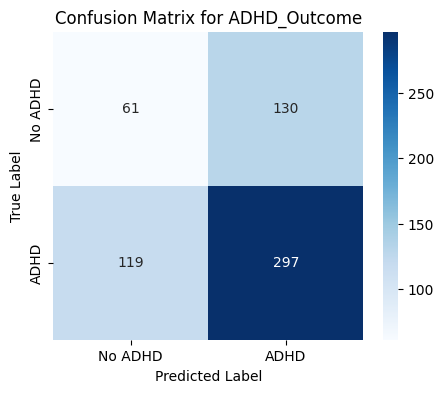

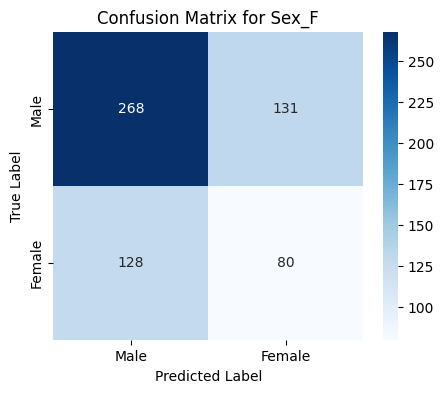

In [29]:

# Create confusion matrix for each target variable:
cms = multilabel_confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix for ADHD_Outcome
plt.figure(figsize=(5, 4))
sns.heatmap(cms[0], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ADHD", "ADHD"], yticklabels=["No ADHD", "ADHD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for ADHD_Outcome")
plt.show()

# Plotting Confusion Matrix for Sex_F
plt.figure(figsize=(5, 4))
sns.heatmap(cms[1], annot=True, fmt="d", cmap="Blues",
            xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Sex_F")
plt.show()

Hyperparameter Tuning

In [30]:
# Hyperparameter grid
param_grid = {
    'estimator__n_estimators': [50, 100],
    'estimator__max_depth': [None, 10],
    'estimator__min_samples_split': [2, 5],
}

# Create grid search object
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'estimator__max_depth': 10, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}


In [31]:
# Calculate accuracy
accuracy_label1 = accuracy_score(y_test['ADHD_Outcome'], y_pred[:, 0].round())  # ADHD_Outcome
accuracy_label2 = accuracy_score(y_test['Sex_F'], y_pred[:, 1].round())  # Sex_F
print(f"Accuracy for ADHD_Outcome: {accuracy_label1:.4f}")
print(f"Accuracy for Sex_F: {accuracy_label2:.4f}")

# Make classification report
print("Classification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0].round()))
print("Classification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred[:, 1].round()))

Accuracy for ADHD_Outcome: 0.8155
Accuracy for Sex_F: 0.6639
Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.76      0.61      0.67       191
           1       0.83      0.91      0.87       416

    accuracy                           0.82       607
   macro avg       0.80      0.76      0.77       607
weighted avg       0.81      0.82      0.81       607

Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       399
           1       0.55      0.12      0.19       208

    accuracy                           0.66       607
   macro avg       0.61      0.53      0.49       607
weighted avg       0.63      0.66      0.58       607

